Upload a grayscale image:


Saving g.png to g.png
Select an edge detection method:
1. Sobel
2. Prewitt
3. Roberts
Enter the number corresponding to the method (1-3): 3


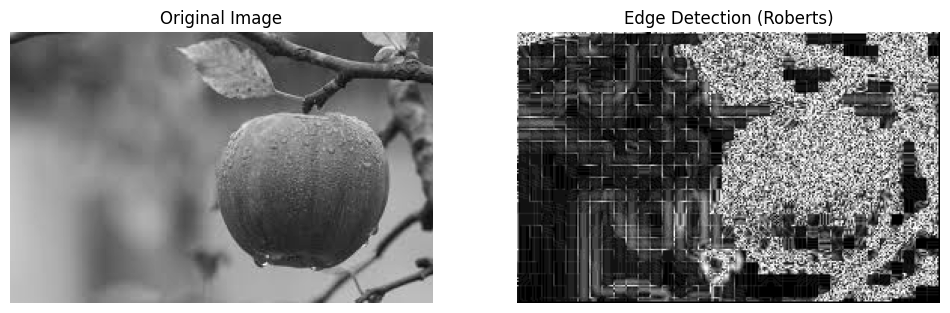

In [ ]:
import cv2
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt

def pad_image(image, pad_size):

    return np.pad(image, pad_size, mode='constant', constant_values=0)

def edge_detection(image, method):
    pad_size = 1
    padded_image = pad_image(image, pad_size)

    if method == 'sobel':
        x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
        y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
        ex = np.zeros_like(image)
        ey = np.zeros_like(image)
        for i in range(1, image.shape[0] - 1):
            for j in range(1, image.shape[1] - 1):
                ex[i, j] = np.sum(padded_image[i-1:i+2, j-1:j+2] * x)
                ey[i, j] = np.sum(padded_image[i-1:i+2, j-1:j+2] * y)
        results = np.sqrt(ex**2 + ey**2)
        return np.clip(results, 0, 255).astype(np.uint8)

    elif method == 'prewitt':
        x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
        y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
        ex = np.zeros_like(image)
        ey = np.zeros_like(image)
        for i in range(1, image.shape[0] - 1):
            for j in range(1, image.shape[1] - 1):
                ex[i, j] = np.sum(padded_image[i-1:i+2, j-1:j+2] * x)
                ey[i, j] = np.sum(padded_image[i-1:i+2, j-1:j+2] * y)
        results = np.sqrt(ex**2 + ey**2)
        return np.clip(results, 0, 255).astype(np.uint8)

    elif method == 'roberts':
        x = np.array([[1, 0], [0, -1]])
        y = np.array([[0, 1], [-1, 0]])
        ex = np.zeros_like(image)
        ey = np.zeros_like(image)
        for i in range(image.shape[0] - 1):
            for j in range(image.shape[1] - 1):
                ex[i, j] = np.sum(padded_image[i:i+2, j:j+2] * x)
                ey[i, j] = np.sum(padded_image[i:i+2, j:j+2] * y)
        results = np.sqrt(ex**2 + ey**2)
        return np.clip(results, 0, 255).astype(np.uint8)

    else:
        raise ValueError("Method must be 'sobel', 'prewitt', or 'roberts'")

def display_images(original, edge_image, method):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(original, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(edge_image, cmap='gray')
    plt.title(f'Edge Detection ({method.capitalize()})')
    plt.axis('off')
    plt.show()

def upload_image():
    uploaded = files.upload()
    if uploaded:
        file_name = next(iter(uploaded))
        image = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE)
        return image
    else:
        print("No files were uploaded.")
        return None

def main():
    print("Upload a grayscale image:")
    image = upload_image()
    if image is None:
        return

    print("Select an edge detection method:")
    print("1. Sobel")
    print("2. Prewitt")
    print("3. Roberts")

    choice = input("Enter the number corresponding to the method (1-3): ")

    if choice == '1':
        method = 'sobel'
    elif choice == '2':
        method = 'prewitt'
    elif choice == '3':
        method = 'roberts'
    else:
        print("Invalid choice. Exiting.")
        return

    edge_image = edge_detection(image, method)
    display_images(image, edge_image, method)

if __name__ == "__main__":
    main()
